In [1]:
import pandas as pd
import csv
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


In [2]:
val = pd.read_csv('MLproject_0411/validation_prediction.csv')

In [10]:
val = val[val['rating'] != "rating"]

In [12]:
val['rating'] = val['rating'].astype('float')
val['prediction'] = val['prediction'].astype('float')

In [13]:
val.head()

,itemID,rating,userID,prediction
0,31,3.0,62449,2.474045
1,31,5.0,125651,3.663294
2,31,5.0,79272,2.888337
3,31,3.0,60695,3.153265
4,31,5.0,36900,3.425373


In [14]:
val["diff_square"] = (val['rating']-val['prediction'])**2

In [15]:
val.head()

,itemID,rating,userID,prediction,diff_square
0,31,3.0,62449,2.474045,0.276629
1,31,5.0,125651,3.663294,1.786784
2,31,5.0,79272,2.888337,4.459120
3,31,3.0,60695,3.153265,0.023490
4,31,5.0,36900,3.425373,2.479451


In [16]:
val['diff_square'].mean()

1.3419465192011175

In [17]:
val['pred_class'] = round(val['prediction'])

In [22]:
val = val.dropna()

In [25]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = val['rating'].astype("int")
y_test = label_binarize(y_test, classes=[1,2,3,4,5])
y_score = val['pred_class'].astype("int")
y_score = label_binarize(y_score, classes=[1,2,3,4,5])
n_classes = y_score.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


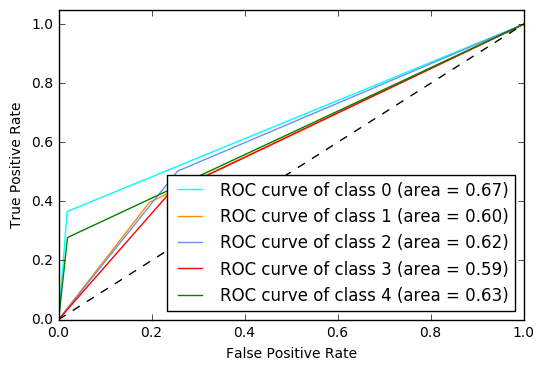

In [26]:
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [27]:
test = pd.read_csv('MLproject_0411/test_prediction.csv')
test = test[test['rating'] != "rating"]
test['rating'] = test['rating'].astype('float')
test['prediction'] = test['prediction'].astype('float')
test["diff_square"] = (test['rating']-test['prediction'])**2
test['diff_square'].mean()

1.3410919703455535

In [29]:
test['pred_class'] = round(test['prediction'])
test = test.dropna()

In [30]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = test['rating'].astype("int")
y_test = label_binarize(y_test, classes=[1,2,3,4,5])
y_score = test['pred_class'].astype("int")
y_score = label_binarize(y_score, classes=[1,2,3,4,5])
n_classes = y_score.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


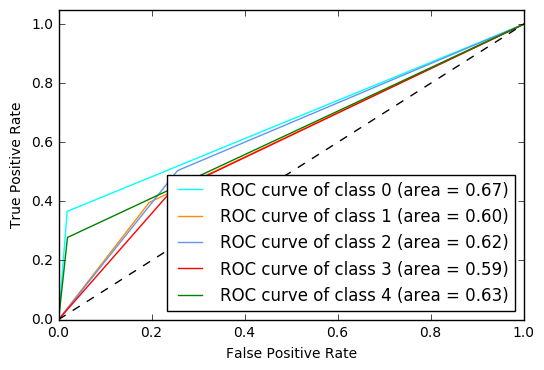

In [31]:
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()